<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
from google.colab import files
uploaded=files.upload()

Saving AXISBANK.csv to AXISBANK.csv


In [49]:
df=pd.read_csv('AXISBANK.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [50]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [51]:
data = train_data['Close']

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data.values.reshape(-1,1))

In [53]:
prediction_days=100
x_train_full = []
y_train_full = []

for x in range(prediction_days, len(scaled_data)):
    x_train_full.append(scaled_data[x - prediction_days:x, 0])
    y_train_full.append(scaled_data[x, 0])

x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)
x_train_full = np.reshape(x_train_full, (x_train_full.shape[0], x_train_full.shape[1], 1))
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [54]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))
    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [55]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_13 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [56]:
# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
97/97 [==============================] - ETA: 0s - loss: 0.0128

97/97 [==============================] - 13s 84ms/step - loss: 0.0128
Epoch 2/25
97/97 [==============================] - ETA: 0s - loss: 0.0036

97/97 [==============================] - 9s 91ms/step - loss: 0.0036
Epoch 3/25
97/97 [==============================] - ETA: 0s - loss: 0.0031

97/97 [==============================] - 8s 87ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - ETA: 0s - loss: 0.0027

97/97 [==============================] - 8s 82ms/step - loss: 0.0027
Epoch 5/25
97/97 [==============================] - ETA: 0s - loss: 0.0027

97/97 [==============================] - 9s 90ms/step - loss: 0.0027
Epoch 6/25
97/97 [==============================] - ETA: 0s - loss: 0.0024

97/97 [==============================] - 9s 92ms/step - loss: 0.0024
Epoch 7/25
97/97 [==============================] - ETA: 0s - loss: 0.0025

97/97 [==============================] - 8s 83ms/step - loss: 0.0025
Epoch 8/25
97/97 [==============================] - ETA: 0s - loss: 0.0023

97/97 [==============================] - 9s 92ms/step - loss: 0.0023
Epoch 9/25
97/97 [==============================] - ETA: 0s - loss: 0.0024

97/97 [==============================] - 9s 93ms/step - loss: 0.0024
Epoch 10/25
97/97 [==============================] - ETA: 0s - loss: 0.0020

97/97 [==============================] - 8s 85ms/step - loss: 0.0020
Epoch 11/25
97/97 [==============================] - ETA: 0s - loss: 0.0024

97/97 [==============================] - 9s 93ms/step - loss: 0.0024
Epoch 12/25
97/97 [==============================] - ETA: 0s - loss: 0.0018

97/97 [==============================] - 9s 94ms/step - loss: 0.0018
Epoch 13/25
97/97 [==============================] - ETA: 0s - loss: 0.0019

97/97 [==============================] - 9s 90ms/step - loss: 0.0019
Epoch 14/25
97/97 [==============================] - ETA: 0s - loss: 0.0018

97/97 [==============================] - 9s 88ms/step - loss: 0.0018
Epoch 15/25
97/97 [==============================] - ETA: 0s - loss: 0.0018

97/97 [==============================] - 9s 89ms/step - loss: 0.0018
Epoch 16/25
97/97 [==============================] - ETA: 0s - loss: 0.0019

97/97 [==============================] - 8s 87ms/step - loss: 0.0019
Epoch 17/25
97/97 [==============================] - ETA: 0s - loss: 0.0020

97/97 [==============================] - 8s 83ms/step - loss: 0.0020
Epoch 18/25
97/97 [==============================] - ETA: 0s - loss: 0.0017

97/97 [==============================] - 9s 91ms/step - loss: 0.0017
Epoch 19/25
97/97 [==============================] - ETA: 0s - loss: 0.0015

97/97 [==============================] - 9s 90ms/step - loss: 0.0015
Epoch 20/25
97/97 [==============================] - ETA: 0s - loss: 0.0016

97/97 [==============================] - 8s 82ms/step - loss: 0.0016
Epoch 21/25
97/97 [==============================] - ETA: 0s - loss: 0.0016

97/97 [==============================] - 9s 89ms/step - loss: 0.0016
Epoch 22/25
97/97 [==============================] - ETA: 0s - loss: 0.0015

97/97 [==============================] - 9s 91ms/step - loss: 0.0015
Epoch 23/25
97/97 [==============================] - ETA: 0s - loss: 0.0016

97/97 [==============================] - 8s 82ms/step - loss: 0.0016
Epoch 24/25
97/97 [==============================] - ETA: 0s - loss: 0.0015

97/97 [==============================] - 9s 91ms/step - loss: 0.0015
Epoch 25/25
97/97 [==============================] - ETA: 0s - loss: 0.0013

97/97 [==============================] - 9s 89ms/step - loss: 0.0013


In [57]:
history=model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
97/97 [==============================] - 10s 104ms/step - loss: 0.0015 - val_loss: 2.4260e-04
Epoch 2/20
97/97 [==============================] - 8s 87ms/step - loss: 0.0013 - val_loss: 2.5009e-04
Epoch 3/20
97/97 [==============================] - 9s 95ms/step - loss: 0.0013 - val_loss: 3.2193e-04
Epoch 4/20
97/97 [==============================] - 9s 96ms/step - loss: 0.0013 - val_loss: 2.2417e-04
Epoch 5/20
97/97 [==============================] - 9s 96ms/step - loss: 0.0014 - val_loss: 5.5188e-04
Epoch 6/20
97/97 [==============================] - 8s 86ms/step - loss: 0.0014 - val_loss: 2.8820e-04
Epoch 7/20
97/97 [==============================] - 9s 96ms/step - loss: 0.0013 - val_loss: 3.2901e-04
Epoch 8/20
97/97 [==============================] - 9s 95ms/step - loss: 0.0015 - val_loss: 2.9425e-04
Epoch 9/20
97/97 [==============================] - 8s 85ms/step - loss: 0.0013 - val_loss: 5.7105e-04
Epoch 10/20
97/97 [==============================] - 9s 94ms/step - los

In [58]:
actual_prices = test_data['Close'].values
test_data_=test_data['Close']
# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data, test_data_), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)

In [59]:
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

# Convert the x_test list to a numpy array
x_test = np.array(x_test)

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

32/32 [==============================] - 1s 20ms/step


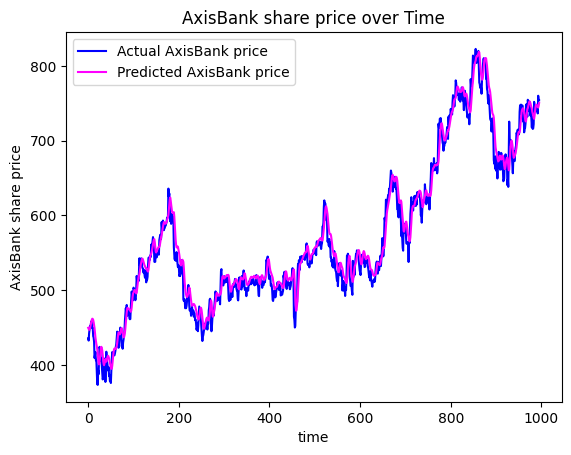

In [60]:
plt.plot(actual_prices, color='blue', label="Actual AxisBank price")
plt.plot(predicted_prices, color='magenta', label="Predicted AxisBank price")
plt.title("AxisBank share price over Time")
plt.xlabel("time")
plt.ylabel("AxisBank share price")
plt.legend()
plt.show()